In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.0 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.0 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.0 MB 1.5 MB/s eta 0:00:08
   - ---------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
data=pd.read_csv('emails.csv')

In [4]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
data=data.drop('Email No.',axis=1)

In [6]:
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [7]:
X = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
y_pred = neigh.predict(X_test)


In [13]:
neigh.score(X_train,y_train)
neigh.score(X_test,y_test)

0.8830917874396135

In [15]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[696,  69],
       [ 52, 218]], dtype=int64)

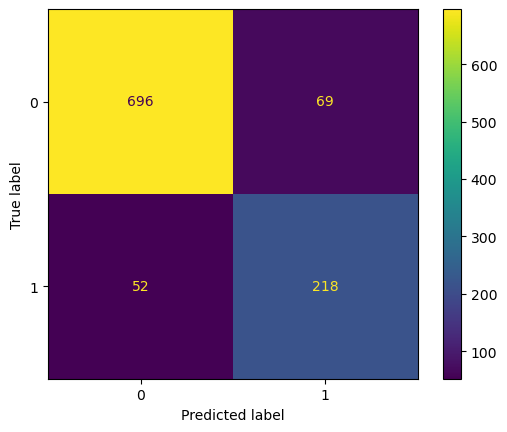

In [16]:
mat=ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()
plt.show()

In [17]:
acc=accuracy_score(y_pred,y_test)

In [18]:
acc

0.8830917874396135

In [19]:
print("error rate" ,1-acc)

error rate 0.11690821256038653


In [27]:
from sklearn.svm import SVC

svm=SVC(gamma='auto')

In [29]:
svm.fit(X_train,y_train)

SVC(gamma='auto')

In [30]:
svm.score(X_train,y_train)
svm.score(X_test,y_test)

0.9169082125603865

In [31]:
y_pred=svm.predict(X_test)

In [32]:
cm=confusion_matrix(y_pred,y_test)

In [33]:
cm

array([[717,  55],
       [ 31, 232]], dtype=int64)

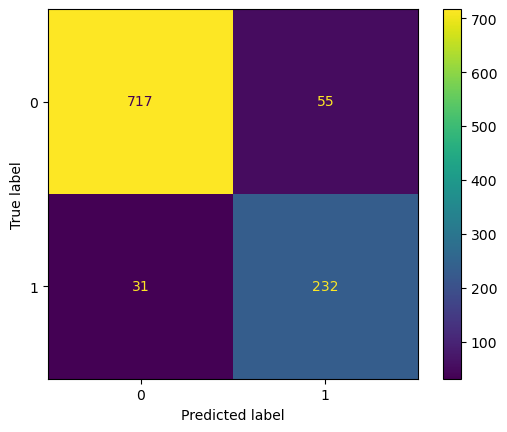

In [34]:
mat=ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()
plt.show()

In [36]:
acc=accuracy_score(y_pred,y_test)
acc

0.9169082125603865

In [37]:
print("Error rate :",1-acc)

Error rate : 0.08309178743961354
